# Generate Experimental Datasets

Below are provided all steps to (i) generate combinations to be tested experimentally and (ii) extract growth rate computations from raw plate reader data

# Install conda on your Colab environment

Ignore this first cell if you are running the notebook in a local environment.

One can still run it locally but it will have no effect.

In [1]:
# Run this cell first - it will install a conda distribution (mamba)
# on your Drive then restart the kernel automatically 
# (don't worry about the crashing/restarting kernel messages)
# It HAS to be runned FIRST everytime you use the notebook in colab

import os
import sys
RunningInCOLAB  = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    !pip install -q condacolab
    import condacolab
    condacolab.install()

# Set up your Colab or local environment
# Then import libraries

Run this cell in both cases of use (local or Colab)

In [2]:
import os
import sys
RunningInCOLAB  = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    
    # Check everything is fine with conda in Colab
    import condacolab
    condacolab.check()
    
    # Mount your drive environment in the colab runtime
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    
    # Change this variable to your path on Google Drive to which the repo has been cloned
    # If you followed the colab notebook 'repo_cloning.ipynb', nothing to change here
    repo_path_in_drive = '/content/drive/My Drive/Github/amn_release/'
    # Change directory to your repo cloned in your drive
    DIRECTORY = repo_path_in_drive
    os.chdir(repo_path_in_drive)
    # Copy the environment given in the environment_amn_light.yml
    !mamba env update -n base -f environment_amn_light.yml
    
    # This is one of the few Colab-compatible font
    font = 'Liberation Sans'
    
else:
    
    # In this case the local root of the repo is our working directory
    DIRECTORY = './'
    font = 'arial'

# printing the working directory files. One can check you see the same folders and files as in the git webpage.
print(os.listdir(DIRECTORY))

from Build_Experimental import *

['README.md', 'Duplicate_Model.ipynb', 'Build_Model_Dense.ipynb', 'Build_Dataset.py', 'Dataset_experimental', '.ipynb_checkpoints', '.git', 'Build_Experimental.ipynb', 'Reservoir', 'Dataset_model', 'Figures.ipynb', 'Result', 'Figures', '.gitignore', 'Duplicate_Model.py', 'LICENSE', 'Build_Dataset.ipynb', 'Dataset_input', '__pycache__', 'Build_Experimental.py', 'old', 'environment_amn.yml', 'Build_Model.py', 'Build_Model.ipynb', '.DS_Store']


# 1) Generate combinations of carbon sources to be tested experimentally

First, define the exchange reactions of the model (here, iML1515) that correspond to variable carbon sources in your experimental setup. Optionally, like here, indicate the corresponding 'human' names.

In [2]:
varmed = ["EX_rib__D_e_i", "EX_malt_e_i", "EX_melib_e_i", "EX_tre_e_i", "EX_fru_e_i", "EX_gal_e_i", "EX_ac_e_i", "EX_lac__D_e_i", "EX_succ_e_i", "EX_pyr_e_i"]

hum_varmed = ["Ribose", "Maltose", "Melibiose", "Trehalose", "Fructose", "Galactose", "Acetate", "Lactate", "Succinate", "Pyruvate"]

Example cell:

1 - Set a seed to reproduce the combinations in all runs.

2 - Set a number of variables turned on by datapoint.

3 - It returns a shuffle full factorial design, displayed as a heatmap.

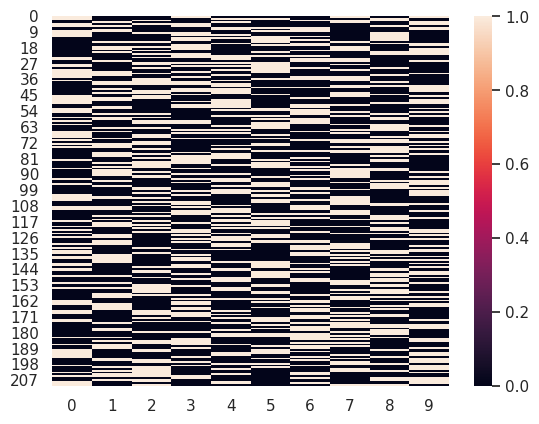

In [14]:
seed=3
nbr_var_on = 4
ffd = all_combinations(seed, nbr_var_on, varmed)
sns.set()
sns.heatmap(ffd)
plt.show()

Generate all combination files for 1-4 carbon sources

In [15]:
seed=3
for nb_cs in range(1,5):
    ffd = all_combinations(seed, nb_cs, varmed)
    name = str(nb_cs)+"comps"
    df = pd.DataFrame(ffd, index=[1+x for x in range(len(ffd))], columns=varmed)
    df.to_csv('Dataset_experimental/compositions_' + name + '.csv')

# 2) Process plate reader raw data: growth rate determination

## Example of the data processing workflow for a single plate 
First, a full processing for a single plate

Appropriate mapping between the raw data and the combinations files (generated at step 1)) has to be done directly in the python file Build_Experimental.py. Details can be found directly in the python file on how to do this mapping.

There is a base name (e.g. 'run_name') for all files of a plate reader run:
- run_name_data.csv : raw data from the plate reader. This has to be manually generated from the output of the plate reader.
- run_name_start_stop.csv : min and max time limits for searching the maximal growth rate. This has to be manually generated.
- run_name_compos.csv : storing the media compositions for this run. This is automatically generated in the data processing.
- run_name_results.csv : storing the results (media compositions and growth rates). This is automatically generated in the data processing.

All these files must be stored under 'Dataset_experimental'.

The only thing to change from a plate run to another is the "run_name" variable.

### Set the run's name and load the data

In [2]:
run_name = "20220826"
run_raw_data_path = "Dataset_experimental/"+run_name+"_data.csv"
data = pd.read_csv(run_raw_data_path, sep=",")

### Get the compositions of this plate reader run

In [3]:
run_dict = dict_all[run_name] # this mapping is stored in the python file 'Build_Experimental.py'. More details there.
compositions = pd.read_csv(run_dict["DoE_file"], index_col=0, sep=",").iloc[run_dict["indices"][0]:run_dict["indices"][1]]
compositions.to_csv('Dataset_experimental/' + run_name + '_compos.csv')
compositions

,EX_rib__D_e_i,EX_malt_e_i,EX_melib_e_i,EX_tre_e_i,EX_fru_e_i,EX_gal_e_i,EX_ac_e_i,EX_lac__D_e_i,EX_succ_e_i,EX_pyr_e_i
31,1,0,0,0,1,1,0,1,0,0
32,1,1,0,1,0,1,0,0,0,0
33,1,1,1,0,0,0,0,0,0,1
34,1,1,0,0,1,0,0,0,1,0
35,1,0,0,1,0,0,1,1,0,0
36,0,0,1,0,0,1,1,1,0,0
37,1,0,1,0,1,0,0,1,0,0
38,0,1,1,1,0,0,0,0,1,0
39,0,1,1,1,1,0,0,0,0,0
40,0,0,0,0,1,0,0,1,1,1


### Visualize all growth curves

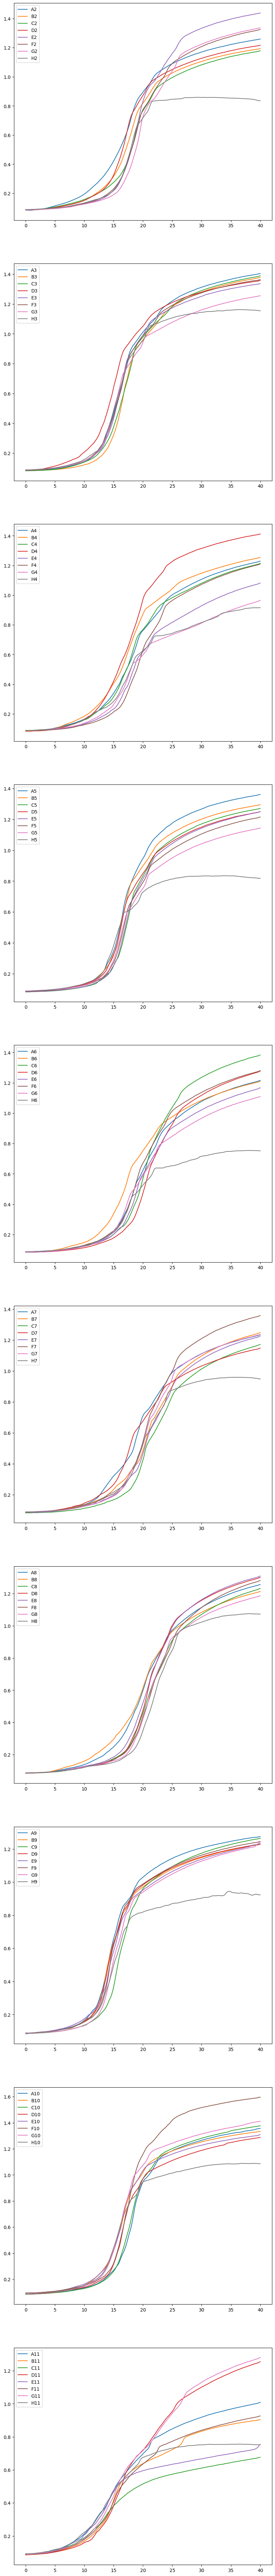

In [5]:
plt.close('all')

fig, axs = plt.subplots(nrows = len(replicates_dic), figsize=(10,100))

i=0
xdata = data["TIME"].to_list()
for rep in replicates_dic:
    for_legend = []
    to_concat = []
    for col in replicates_dic[rep]:
        for_legend.append(col)
        ydata = data[col].to_list()
        ydata = curve_smoothing(ydata)
        ydata = curve_smoothing(ydata)
        ydata = curve_smoothing(ydata)
        axs[i].plot(xdata, ydata)
        axs[i].legend(for_legend, loc='best')
    i+=1
    
plt.show()

Identify some outliers from the curves, add them to outliers lists in Build_Experimental.py

In [4]:
out = outliers_dic[run_name]
out

['G2',
 'H2',
 'C3',
 'D3',
 'E3',
 'F3',
 'H3',
 'A4',
 'B4',
 'E4',
 'F4',
 'B5',
 'E5',
 'H5',
 'E6',
 'G6',
 'H6',
 'C7',
 'B8',
 'C8',
 'F8',
 'G8',
 'H8',
 'B9',
 'C9',
 'D9',
 'F9',
 'B10',
 'B11',
 'D11']

Fill up the 'start_stop' file manually

In [5]:
start_stop = pd.read_csv('Dataset_experimental/' + run_name + '_start_stop.csv', index_col=0, sep=",")
start_stop

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Compute all maximal growth rates

In [7]:
all_grs = growth_rate_determination(data, out, start_stop)
gr_df = pd.DataFrame(all_grs, columns = ["GR_" +str(i) for i in range(1,9)])
gr_df

,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8
0,0.20245,0.247148,0.298453,0.290705,0.299738,0.300215,<NA>,<NA>
1,0.369287,0.370988,<NA>,<NA>,<NA>,<NA>,0.395089,<NA>
2,<NA>,<NA>,0.231091,0.218677,<NA>,<NA>,0.248761,0.229897
3,0.357842,<NA>,0.372467,0.373017,<NA>,0.372673,0.361427,<NA>
4,0.260221,0.241647,0.281107,0.286537,<NA>,0.286689,<NA>,<NA>
5,0.254874,0.245461,<NA>,0.267864,0.26812,0.25183,0.281674,0.256935
6,0.200915,<NA>,<NA>,0.279072,0.260733,<NA>,<NA>,<NA>
7,0.382175,<NA>,<NA>,<NA>,0.400052,<NA>,0.436497,0.352992
8,0.341575,<NA>,0.340986,0.416754,0.342987,0.383552,0.356544,0.358787
9,0.192927,<NA>,0.16392,<NA>,0.206822,0.218777,0.204666,0.182186


Add the average and standard deviation, save the dataset

In [10]:
compositions_w_grs = pd.concat([compositions, gr_df.set_index(compositions.index)], axis=1)
compositions_w_grs['GR_AVG'] = compositions_w_grs[["GR_" +str(i) for i in range(1,9)]].mean(axis=1)
compositions_w_grs['GR_STD'] = compositions_w_grs[["GR_" +str(i) for i in range(1,9)]].std(axis=1)
compositions_w_grs.to_csv("Dataset_experimental/" + run_name + "_results.csv", index=True)
compositions_w_grs

,EX_rib__D_e_i,EX_malt_e_i,EX_melib_e_i,EX_tre_e_i,EX_fru_e_i,EX_gal_e_i,EX_ac_e_i,EX_lac__D_e_i,EX_succ_e_i,EX_pyr_e_i,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_AVG,GR_STD
31,1,0,0,0,1,1,0,1,0,0,0.20245,0.247148,0.298453,0.290705,0.299738,0.300215,<NA>,<NA>,0.273118,0.040156
32,1,1,0,1,0,1,0,0,0,0,0.369287,0.370988,<NA>,<NA>,<NA>,<NA>,0.395089,<NA>,0.378455,0.014431
33,1,1,1,0,0,0,0,0,0,1,<NA>,<NA>,0.231091,0.218677,<NA>,<NA>,0.248761,0.229897,0.232106,0.012431
34,1,1,0,0,1,0,0,0,1,0,0.357842,<NA>,0.372467,0.373017,<NA>,0.372673,0.361427,<NA>,0.367485,0.007281
35,1,0,0,1,0,0,1,1,0,0,0.260221,0.241647,0.281107,0.286537,<NA>,0.286689,<NA>,<NA>,0.271240,0.019794
36,0,0,1,0,0,1,1,1,0,0,0.254874,0.245461,<NA>,0.267864,0.26812,0.25183,0.281674,0.256935,0.260965,0.012280
37,1,0,1,0,1,0,0,1,0,0,0.200915,<NA>,<NA>,0.279072,0.260733,<NA>,<NA>,<NA>,0.246907,0.040872
38,0,1,1,1,0,0,0,0,1,0,0.382175,<NA>,<NA>,<NA>,0.400052,<NA>,0.436497,0.352992,0.392929,0.034926
39,0,1,1,1,1,0,0,0,0,0,0.341575,<NA>,0.340986,0.416754,0.342987,0.383552,0.356544,0.358787,0.363026,0.028034
40,0,0,0,0,1,0,0,1,1,1,0.192927,<NA>,0.16392,<NA>,0.206822,0.218777,0.204666,0.182186,0.194883,0.019661


## Example of the data processing workflow for all plates 
Now, a full processing for all plates in a single cell

In [12]:
all_plates = ["20220504", "20220429", "20220506", "20220507", "20220512", "20220513", "20220514", '20220823', '20220824', '20220825', '20220826']
for run_name in all_plates:
    run_raw_data_path = "Dataset_experimental/"+run_name+"_data.csv"
    data = pd.read_csv(run_raw_data_path, sep=",")
    run_dict = dict_all[run_name] # this mapping is stored in the python file 'Build_Experimental.py'. More details there.
    compositions = pd.read_csv(run_dict["DoE_file"], index_col=0, sep=",").iloc[run_dict["indices"][0]:run_dict["indices"][1]]
    compositions.to_csv('Dataset_experimental/' + run_name + '_compos.csv')
    out = outliers_dic[run_name]
    start_stop = pd.read_csv('Dataset_experimental/' + run_name + '_start_stop.csv', index_col=0, sep=",")
    all_grs = growth_rate_determination(data, out, start_stop)
    gr_df = pd.DataFrame(all_grs, columns = ["GR_" +str(i) for i in range(1,9)])
    compositions_w_grs = pd.concat([compositions, gr_df.set_index(compositions.index)], axis=1)
    compositions_w_grs['GR_AVG'] = compositions_w_grs[["GR_" +str(i) for i in range(1,9)]].mean(axis=1)
    compositions_w_grs['GR_STD'] = compositions_w_grs[["GR_" +str(i) for i in range(1,9)]].std(axis=1)
    compositions_w_grs.to_csv("Dataset_experimental/" + run_name + "_results.csv", index=True)

## Merge all results file in a single .csv file

In [16]:
runs_to_concat = ["20220504", "20220429", "20220506", "20220507", "20220512", "20220513", "20220514", '20220823', '20220824', '20220825', '20220826']
index_cols = [0 for i in runs_to_concat]
folder = "Dataset_experimental/"
training_set_filename = "EXP110.csv"
results_to_concat = []

for run_name in runs_to_concat:
    results_f = folder + run_name + '_results.csv'
    results = pd.read_csv(results_f, index_col=index_cols[runs_to_concat.index(run_name)])
    results_to_concat.append(results)
    
training_set_df = pd.concat(results_to_concat, ignore_index=True)
training_set_df

,EX_rib__D_e_i,EX_malt_e_i,EX_melib_e_i,EX_tre_e_i,EX_fru_e_i,EX_gal_e_i,EX_ac_e_i,EX_lac__D_e_i,EX_succ_e_i,EX_pyr_e_i,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,GR_AVG,GR_STD
0,0,0,0,0,0,1,0,0,0,0,0.169077,0.158486,0.161497,0.189294,NaN,NaN,NaN,NaN,0.169588,0.013872
1,0,0,0,0,1,0,0,0,0,0,0.112542,0.137510,0.161887,0.124116,NaN,NaN,NaN,NaN,0.134014,0.021199
2,0,1,0,0,0,0,0,0,0,0,NaN,NaN,0.184592,0.182140,NaN,NaN,0.198978,NaN,0.188570,0.009096
3,0,0,1,0,0,0,0,0,0,0,0.234978,NaN,0.162976,NaN,NaN,NaN,NaN,NaN,0.198977,0.050913
4,0,0,0,0,0,0,0,0,0,1,0.067542,0.070027,0.077356,0.076734,0.064198,0.061576,0.082361,0.076108,0.071988,0.007257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0,1,0,0,1,1,1,0,0,0.254874,0.245461,NaN,0.267864,0.268120,0.251830,0.281674,0.256935,0.260965,0.012280
106,1,0,1,0,1,0,0,1,0,0,0.200915,NaN,NaN,0.279072,0.260733,NaN,NaN,NaN,0.246907,0.040872
107,0,1,1,1,0,0,0,0,1,0,0.382175,NaN,NaN,NaN,0.400052,NaN,0.436497,0.352992,0.392929,0.034926
108,0,1,1,1,1,0,0,0,0,0,0.341575,NaN,0.340986,0.416754,0.342987,0.383552,0.356544,0.358787,0.363026,0.028034


In [17]:
training_set_df.to_csv(folder+training_set_filename)